# Visualising vector fields in 2D and 3D

- instead of `matplotlib` you might want to consider using the `plotly` library for doing scientific plots like this, especially when it comes to plotting in 3D

In [3]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt

# This is a magic command for plots being plotted inline in the notebook. 
# Use 'qt' for more interactive 3D plots in a separate window (might not work on colab and other online platforms)
# %matplotlib qt

### Simple 2D vector field plot

Also try the vector fields:

$$
    V(x,y) = (-y,x)\qquad V(x,y) = (-y,-x)
$$

See how a simple change in sign can change the geometry of the vector field completely!

<ipython-input-8-89f67964027d>:3: RuntimeWarning: invalid value encountered in true_divide
  return (-x/(x**2+y**2),-y/(x**2+y**2))


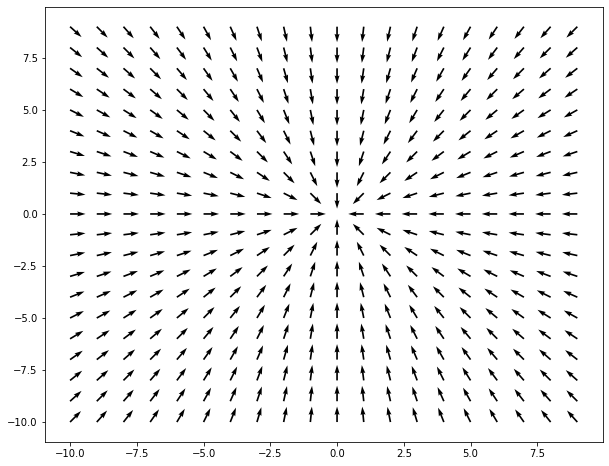

<Figure size 432x288 with 0 Axes>

In [8]:
# The vector field function
def V(x:float, y:float)-> tuple:
    return (-x/(x**2+y**2),-y/(x**2+y**2))

# Create the grid to calculate and display the vector field on 
RangeX = np.arange(-10, 10, 1)
RangeY = np.arange(-10, 10, 1)
X, Y = np.meshgrid(RangeX, RangeY)

# # Calculate the Vector field at each point on the grid by applying V to each component of the array X and Y.
# As the plotting functions of matplotlib want separate x, and y-components we use tuple unpacking
V_X, V_Y = V(X,Y) # can manipulate this to normalize the vectors

# ie: attempt at normalization - loses data on strength of the field and may not always work
xy = np.sqrt(V_X**2 + V_Y**2)
V_X = V_X / xy
V_Y = V_Y / xy

# We create a figure here, but we could have used `plt.quiver` directly as well
fig, ax = plt.subplots(figsize = (10,8))
ax.quiver(X, Y, V_X, V_Y)

# Not displayed! (Bug)
# ax.quiverkey(q, X=0.3, Y=1.1, U=10, label='Quiver key, length = 10', labelpos='E', coordinates='figure')

plt.show()
plt.savefig('normalization attempt')

### Simple 3D vector field plot

In [13]:
# Matplotlib toolkit for 3D plots 
from mpl_toolkits.mplot3d import Axes3D

# The vector field function in 3D
def V(x:float, y:float, z:float)-> tuple:
    return (y, -x, z)

# Create the grid to calculate and display the vector field on 
RangeX = np.arange(-10, 10, 2)
RangeY = np.arange(-10, 10, 2)
RangeZ = np.arange(-10, 10, 2)
X, Y, Z = np.meshgrid(RangeX, RangeY, RangeZ)

# Calculate the Vector field at each point on the grid by applying V to each component of the array X and Y.
# As the plotting functions of matplotlib want separate x, y and z-components we use tuple unpacking
V_X, V_Y, V_Z = V(X,Y,Z) 

# Adding 3D axes to a figure has to be initialised differently from 2D plots
fig = plt.figure(figsize = (10,8))
ax = Axes3D(fig)

# We normalise all of the vector to unit vectors to be able to see the vector field
ax.quiver(X, Y, Z, V_X, V_Y, V_Z, normalize= True)

# ax.quiverkey(q, X=0.3, Y=1.1, U=10, label='Quiver key, length = 10', labelpos='E', coordinates='figure')

plt.show()

### Adding colours to display magnitude in 2D

In [20]:
# The vector field function
def V(x:float, y:float)-> tuple:
    return (-y,-x)

# Create the grid to calculate and display the vector field on 
RangeX = np.arange(-10.2, 10, 1)
RangeY = np.arange(-10.2, 10, 1)
X, Y = np.meshgrid(RangeX, RangeY)

# Calculate the Vector field at each point on the grid by applying V to each component of the array X and Y.
# As the plotting functions of matplotlib want separate x, and y-components we use tuple unpacking
V_X, V_Y = V(X,Y) 

# Calculate magnitude for normalising and colouring
Mag = np.hypot(V_X, V_Y)

# Whenever we have zero we set it to 1 to avoid division by zero
is_zero = np.equal(Mag, np.zeros_like(Mag))
Mag[is_zero] = 1

# Normalise the vector field. We have to do this manually as the 2D quiver function does not have this method yet
V_X = V_X/Mag
V_Y = V_Y/Mag

fig, ax = plt.subplots(figsize = (10,8))

ax.quiver(X, Y, V_X, V_Y, Mag, cmap='plasma')

# Not displayed! (Bug)
# ax.quiverkey(q, X=0.3, Y=1.1, U=10, label='Quiver key, length = 10', labelpos='E', coordinates='figure')

plt.show()

### Adding colours to display magnitude in 3D

**`Axes3D` does not have the property to plot the vector field in 3D using different colours based on the magnitude as of yet. It is possible to do and implement, but requires to dig deeper into the internal workings of matplotlib to be able to do that: You have to create your own colour map matching the plot.** (The creation of the colour map for the 3D plot has been taken and adapted from here: https://stackoverflow.com/a/49888126)

In [21]:
# Matplotlib toolkit for 3D plots 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# The vector field function in 3D
def V(x:float, y:float, z:float)-> tuple:
    return (-x, -y, -z)

# Create the grid to calculate and display the vector field on 
RangeX = np.arange(-10, 10, 2)
RangeY = np.arange(-10, 10, 2)
RangeZ = np.arange(-10, 10, 2)
X, Y, Z = np.meshgrid(RangeX, RangeY, RangeZ)

# Calculate the Vector field at each point on the grid by applying V to each component of the array X and Y.
# As the plotting functions of matplotlib want separate x, y and z-components we use tuple unpacking
V_X, V_Y, V_Z = V(X,Y,Z) 

# Calculate the magnitudes of each vector for colour display
# Note that `np.hypot` does not work in 3D.
Mag = np.sqrt(V_X**2 + V_Y**2+ V_Y**2)

# Adding 3D axes to a figure has to be initialised differently from 2D plots
fig = plt.figure(figsize = (10,8))
ax = Axes3D(fig)

# Color by magnitude
c = Mag
# Flatten array (make it 1D) and normalise
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines to match the data of 3D plot correctly
c = np.concatenate((c, np.repeat(c, 2)))
# Select the colormap
c = plt.cm.plasma(c)

# We normalise all of the vector to unit vectors to be able to see the vector field
ax.quiver(X, Y, Z, V_X, V_Y, V_Z, normalize= True, color=c)

# ax.quiverkey(q, X=0.3, Y=1.1, U=10, label='Quiver key, length = 10', labelpos='E', coordinates='figure')

plt.show()